In [54]:
import math
import skimage.io

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
tf.compat.v1.disable_eager_execution()

(196, 196)


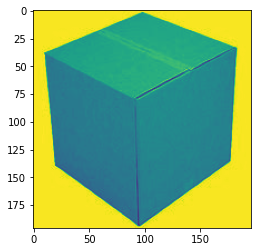

In [56]:
image = skimage.io.imread('box.jpg',as_gray=True)
plt.imshow(image)

print(image.shape)

In [57]:
image

array([[0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       ...,
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686]])

In [58]:
tf.compat.v1.reset_default_graph()

In [59]:
kernel = np.array([3,3])
kernel = [[-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]]

In [60]:
input_shape = (1, image.shape[0], image.shape[1], 1)
input_placeholder = tf.compat.v1.placeholder(dtype=tf.float32, shape=input_shape)

In [61]:
with tf.name_scope('convolution'):
    conv_w = tf.compat.v1.constant(kernel, dtype=tf.float32, shape=(3,3,1,1))
    
    output = tf.compat.v1.nn.conv2d(input=input_placeholder,
                         filter=conv_w,
                         strides=[1,1,1,1],
                         padding='SAME')

In [62]:
with tf.compat.v1.Session() as sess:
    result = sess.run(output, feed_dict={input_placeholder:image[np.newaxis,:,:,np.newaxis]})

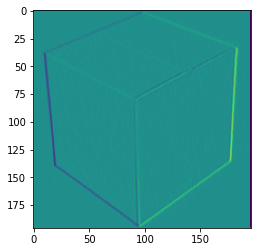

In [64]:
plt.imshow(result[0,:,:,0])